<h1>Planes in Satellite Imagery Classification</h1>

Importing neccessary machine learning and data analysis libraries

In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import sklearn
import matplotlib.pyplot as plt
import itertools
import shutil
import os
import glob
import random
%matplotlib inline

The dataset has been downloaded from Kaggle and placed under the same directory as this notebook file. 

In [53]:
cd data/planesnet/planesnet

/Users/antonytomy/Desktop/Programming/Planes_Satellite_Imagery_Classification/data/planesnet/planesnet


Using the Glob library along with a regular expression to print all the images that represent the not plane class

In [54]:
glob.glob('0*') 

['0__20160830_220147_1_0c82__-118.404769319_33.9416321899.png',
 '0__20170719_175047_100e__-118.40781508443501_33.94129980122077.png',
 '0__20160816_013440_0c64__-121.91987567595737_37.40861204070958.png',
 '0__20151112_182744_0c47__-118.40231222557277_33.91847493619505.png',
 '0__20170613_174900_1036__-118.4027354342325_33.940329740391554.png',
 '0__20160316_153307_0b0a__-121.99515109661685_37.353599569288576.png',
 '0__20160220_181852_0c73__-117.287854152_32.8387167946.png',
 '0__20170108_174739_0e0d__-117.567113735_34.0228812815.png',
 '0__20170414_180531_0f28__-122.505781318_37.7006565734.png',
 '0__20170722_175150_1033__-118.41113652126215_33.94193811809488.png',
 '0__20170729_180856_1044__-121.82615804301015_37.35152940952327.png',
 '0__20160916_174733_0e20__-118.406192381_33.9393434118.png',
 '0__20150608_182654_090c__-118.365481116_33.9815460832.png',
 '0__20150609_184105_090c__-122.586749185_37.6503221921.png',
 '0__20170508_180613_1010__-122.391807935_37.6175710321.png',
 '0_

Using the Glob library along with a regular expression to print all the images that represent the plane class

In [55]:
glob.glob('1*')

['1__20170620_175442_0e30__-118.40972173523741_33.94610057751408.png',
 '1__20161202_180738_0e30__-122.389540025_37.6137607508.png',
 '1__20170520_174842_1008__-118.403328777_33.9467128724.png',
 '1__20161112_174903_0e14__-118.404734054_33.9457580624.png',
 '1__20170620_174906_1032__-118.40918488031139_33.94019106184373.png',
 '1__20170712_181047_1035__-122.3931819474448_37.619233842115186.png',
 '1__20170615_174858_0f51__-118.40720991503414_33.9394095908632.png',
 '1__20170513_174817_0f10__-118.404937815_33.9465574711.png',
 '1__20170420_174631_1009__-118.410663192_33.9393863324.png',
 '1__20170515_180655_1007__-122.380298664_37.6175005451.png',
 '1__20170501_180613_100e__-122.391771224_37.6173487046.png',
 '1__20170620_175442_0e30__-118.40128076130756_33.94006225407405.png',
 '1__20170621_174956_0e0d__-117.19879528524052_32.73294889199829.png',
 '1__20170414_174728_0e14__-117.204705391_32.7338534405.png',
 '1__20160215_210554_0c68__-122.216411558_37.7188167931.png',
 '1__20170413_180

We can use the len() function to see that there are 24000 images of not planes and 8000 images of planes in this dataset

In [56]:
print(len(glob.glob('0*')))
print(len(glob.glob('1*')))

24000
8000


Due to the large difference in the amount of images between the two classes, we can delete 10000 randomly selected images from the not plane class to leave us with 14000 images remaining to make the dataset more evenly distributed.

In [57]:
for i in random.sample(glob.glob('0*'),10000):
    os.remove(i)

In [58]:
print(len(glob.glob('0*')))

14000


We can create a directory TrainValidTest and create a training, validation, and testing folder for each of the classes using the python os module.

In [59]:
os.makedirs('TrainValidTest')
os.chdir('TrainValidTest')
os.makedirs('train/Plane')
os.makedirs('train/NotPlane')
os.makedirs('valid/Plane')
os.makedirs('valid/NotPlane')
os.makedirs('test/Plane')
os.makedirs('test/NotPlane')

We have decided to allocate 70% of our dataset for training and 20% for validation during our training process. This leaves 10% for the testing our model. 

In [62]:
train_ratio=0.7
valid_ratio=0.2
test_ratio=0.1
not_planes=len(glob.glob('0*'))
planes=len(glob.glob('1*'))

In [72]:
cd ..

0__20140723_181317_0905__-122.14328662_37.697282118.png
0__20140723_181317_0905__-122.166243758_37.6649723192.png
0__20140922_155952_080b__-117.5536264_34.047536761.png
0__20140922_155952_080b__-117.581395425_34.0539290694.png
0__20140922_155952_080b__-117.584660202_34.0559968957.png
0__20140922_155952_080b__-117.603865058_34.0504928572.png
0__20140923_154034_1_080e__-117.79481242830049_33.68493046628851.png
0__20140923_154034_1_080e__-117.796278277_33.6859491997.png
0__20140923_154034_1_080e__-117.80790980174179_33.70107976634761.png
0__20140923_154034_1_080e__-117.810965685_33.695567165.png
0__20140923_154034_1_080e__-117.8175694371447_33.69560481214676.png
0__20140923_154034_1_080e__-117.821584663_33.6889492024.png
0__20140923_154034_1_080e__-117.828861126_33.6984246716.png
0__20140923_154034_1_080e__-117.832849515_33.7058385131.png
0__20140923_154034_1_080e__-117.83380544551203_33.70090769842641.png
0__20140923_154034_1_080e__-117.8469922309662_33.72516918126229.png
0__20140923_154

Moving the required amount of each class from our dataset to their corresponding directories using the shutil library along with the random library to select the images randomly.

In [76]:
for c in random.sample(glob.glob('1*'),int(planes*train_ratio)):
    shutil.move(c,'TrainValidTest/train/Plane')
    
for c in random.sample(glob.glob('0*'),int(not_planes*train_ratio)):
    shutil.move(c,'TrainValidTest/train/NotPlane')
    
for c in random.sample(glob.glob('1*'),int(planes*valid_ratio)):
    shutil.move(c,'TrainValidTest/valid/Plane')
    
for c in random.sample(glob.glob('0*'),int(not_planes*valid_ratio)):
    shutil.move(c,'TrainValidTest/valid/NotPlane')
    
for c in random.sample(glob.glob('1*'),int(planes*test_ratio)):
    shutil.move(c,'TrainValidTest/test/Plane')
    
for c in random.sample(glob.glob('0*'),int(not_planes*test_ratio)):
    shutil.move(c,'TrainValidTest/test/NotPlane')   

for switching to right directory for only training(we proprocessed the data already)

In [6]:
cd data/planesnet/planesnet

/Users/antonytomy/Desktop/Programming/Planes_Satellite_Imagery_Classification/data/planesnet/planesnet


/Users/antonytomy/opt/anaconda3/envs/tf/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
train_path='TrainValidTest/train'
valid_path='TrainValidTest/valid'
test_path='TrainValidTest/test'

importing tensorflow and keras classes and methods for our CNN model

In [3]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

Using the ImageDataGenerator function from Keras to create a python generator that will preprocess the images for the training,validation,testing and feed them to the model later on. These generator will feed 32 images a time and these images will be 20 by 20 pixels in binary format.

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(20, 20),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(20, 20),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(20, 20),
    batch_size=32,
    class_mode='binary',
    shuffle=False  
)

Found 15400 images belonging to 2 classes.
Found 4400 images belonging to 2 classes.
Found 2201 images belonging to 2 classes.


Function that utilized matplotlib in order to plot the images that are in matrix format.

In [8]:
def plotImages(images_arr):
    fig, axes=plt.subplots(1,10,figsize=(20,20))
    axes=axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Plotting 10 images from the training set at a time

In [9]:
imgs, labels= next(train_generator)

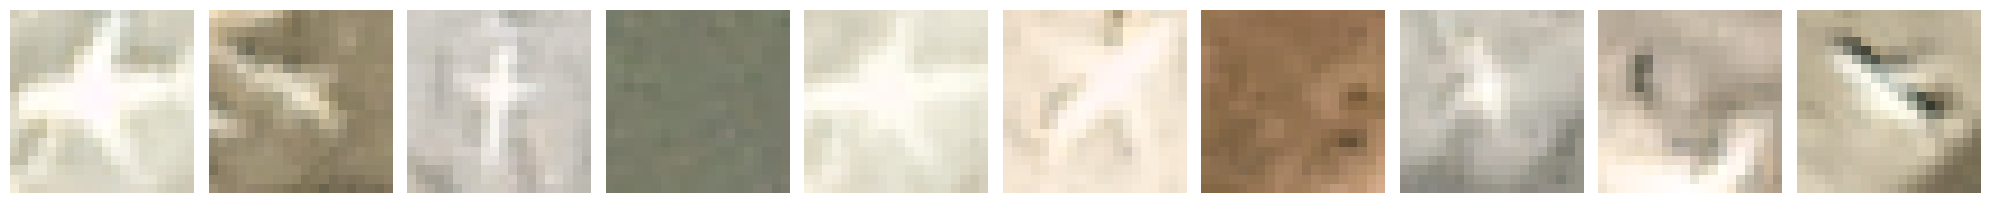

[1. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


In [10]:
plotImages(imgs[:10])
print(labels[:10])

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ReduceLROnPlateau

Using the the following class_weight code in order to address the class imbalance  still present in our dataset by giving more importance to the minority class (plane).

In [12]:
class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

We can now define our CNN model with 3 Convolutional Layers with 32,64, and 128 filters and the relu activation function since research suggests this is the most effective for our type of image classification. In between these convolutional layers we have 3 MaxPooling layers that will be reduce the dimensionality of our image. After this, the remaining output will be flattened and fed to a normal neural network with 256 neurons. We can also add a dropout of 0.5 to this layer which will turn of 50 percent of the neurons which will cause the remaining to more easily learn the features of the images according to research. Finally, we can get the result of our classification as a 0 or 1 from the final output neuron with the sigmoid activation function.  

In [13]:
model = Sequential([
    Conv2D(32, (4, 4), activation='relu', padding='same', input_shape=(20, 20, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(64, (4, 4), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(128, (4, 4), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         131200    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

Compiling our model with the adam optmizer which is know to best change the parameters of our model to maximize the accuracy after training. We will define our model to use the binary crossentropy loss function since this is a case of binary classification.

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Calling the model.fit to train the model with our training and validation image sets with 20 iterations over the training set. We can save the history of our training to a variable called history.

In [16]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20,class_weight=class_weights_dict
)

Epoch 1/20


2024-12-03 16:33:40.482428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-12-03 16:33:40.488301: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


477/482 [============================>.] - ETA: 0s - loss: 0.3492 - accuracy: 0.8173

2024-12-03 16:33:44.168928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


482/482 [==============================] - 5s 9ms/step - loss: 0.3474 - accuracy: 0.8184 - val_loss: 0.1902 - val_accuracy: 0.9220
Epoch 2/20
482/482 [==============================] - 4s 7ms/step - loss: 0.1660 - accuracy: 0.9326 - val_loss: 0.2152 - val_accuracy: 0.9084
Epoch 3/20
482/482 [==============================] - 4s 8ms/step - loss: 0.1352 - accuracy: 0.9460 - val_loss: 0.1009 - val_accuracy: 0.9611
Epoch 4/20
482/482 [==============================] - 4s 8ms/step - loss: 0.1032 - accuracy: 0.9595 - val_loss: 0.1133 - val_accuracy: 0.9559
Epoch 5/20
482/482 [==============================] - 4s 9ms/step - loss: 0.0877 - accuracy: 0.9673 - val_loss: 0.0833 - val_accuracy: 0.9670
Epoch 6/20
482/482 [==============================] - 5s 10ms/step - loss: 0.0818 - accuracy: 0.9673 - val_loss: 0.0865 - val_accuracy: 0.9702
Epoch 7/20
482/482 [==============================] - 4s 9ms/step - loss: 0.0649 - accuracy: 0.9758 - val_loss: 0.0712 - val_accuracy: 0.9759
Epoch 8/20
482/4

We can use matplotlib and our model history in order to plot the accuracy of the model during training on the training and validation set.

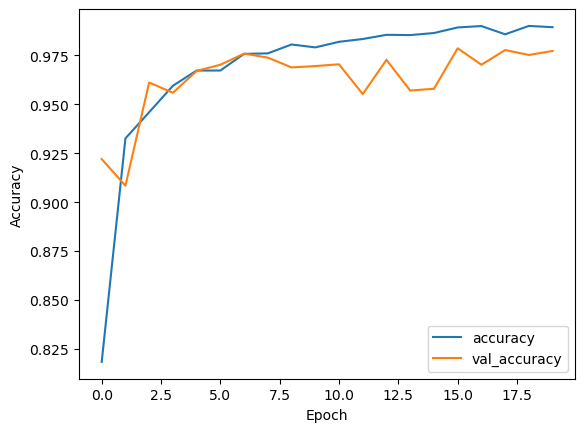

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

We can evaluate the trained model our our test set and see that we can a final testing accuracy of 97% which proves that it was successfull in classifying between planes and not planes.

In [18]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(test_accuracy)

18/69 [======>.......................] - ETA: 0s - loss: 0.0183 - accuracy: 0.9931

2024-12-03 16:35:04.560344: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


69/69 [==============================] - 1s 9ms/step - loss: 0.0675 - accuracy: 0.9782
0.9781917333602905


Using the following code from the tensorflow library in order to plot the confusion matrix of the CNN model based on the predictions and the true output of the model.

In [19]:
y_pred = model.predict(test_generator)
y_pred_binary = (y_pred > 0.5).astype(int).flatten()  

y_true = test_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred_binary))

29/69 [===========>..................] - ETA: 0s

2024-12-03 16:35:05.178427: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


69/69 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1401
           1       0.96      0.98      0.97       800

    accuracy                           0.98      2201
   macro avg       0.97      0.98      0.98      2201
weighted avg       0.98      0.98      0.98      2201



We can also seaborn which is another graphing library in order to plot the confusion matrix of this model based on the values from the predictions and true values 

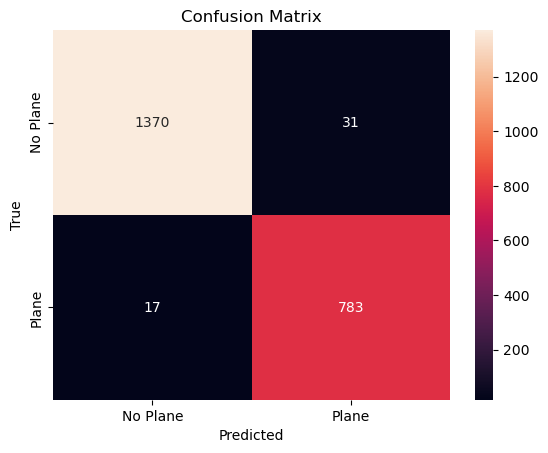

In [20]:
cm = confusion_matrix(y_true, y_pred_binary)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['No Plane', 'Plane'], yticklabels=['No Plane', 'Plane'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

We can save our model as a plane_classifier_cnn.h5 file which can be imported and used by other people for their various applications.

In [21]:
model.save('plane_classifier_cnn.h5')